# Qubit Topologies

Changing working directory from `./notebooks/` to `./`, in order to import the Python packages defined in the repository.

In [1]:
import os
DEBUG = True
try:
    print("Original working directory: %s"%str(original_wd)) # type: ignore
    """
        You only get here if you---by mistake or otherwise---are re-running this cell, 
        in which case the working should not be changed again.
    """
except NameError:
    original_wd = os.getcwd()
    os.chdir('../')
print("Current working directory: %s"%str(os.getcwd()))

Current working directory: C:\Users\Stefa\Documents\git\pauliopt


General purpose imports:

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
import qiskit

## Topologies

The `Topology` class can be used to construct qubit topologies. Its constructor takes a number of qubits and a variadic sequence of qubit couplings (in the form of pairs of qubits) and produces a basic undirected graph data structure, suitable for adjacency queries and graph searches. 

In [3]:
from pauliopt.topologies import Topology

For example, the following topology reproduces the qubit couplings of the IBMQ Vigo machine:

In [4]:
topology = Topology(5, [[0, 1], [1, 2], [1, 3], [3, 4]])
topology

Topology({0, 1, 2, 3, 4}, [{3, 4}, {0, 1}, {1, 3}, {1, 2}])

The number of qubits of the topology can be accessed from the property `Topology.num_qubits`, while the couplings between qubits can be accessed from the property `Topology.couplings`. The property `Topology.qubits` returns the range of qubits for the topology.

In [5]:
print(f"{topology.num_qubits = }")
print(f"{topology.qubits = }")
print(f"{topology.couplings = }")

topology.num_qubits = 5
topology.qubits = range(0, 5)
topology.couplings = frozenset({Coupling(3, 4), Coupling(0, 1), Coupling(1, 3), Coupling(1, 2)})


The couplings are stored as unordered pairs, instances of `Coupling` (a special-purpose subclass of `frozenset`). Coupling is a bare-bones class: the only changes to frozenset are the constructor (which only accepts two distinct integers), the property `Coupling.as_pair` (which returns a pair as a `tuple` instance with elements sorted in increasing order) and changes to the `Coupling.__str__()` and `Coupling.__repr__()` magic methods:

In [6]:
from pauliopt.topologies import Coupling
coupling = Coupling(2, 1)
print(f"{repr(coupling) = }")
print(f"{str(coupling) = }")
print(f"{coupling.as_pair = }")

repr(coupling) = 'Coupling(1, 2)'
str(coupling) = '{1, 2}'
coupling.as_pair = (1, 2)


The topology gives access to the set qubits adjacent (i.e. couple) to a given qubit:

In [7]:
for q in topology.qubits:
    print(f"topology.adjacent({q}) = {topology.adjacent(q)}")

topology.adjacent(0) = frozenset({1})
topology.adjacent(1) = frozenset({0, 2, 3})
topology.adjacent(2) = frozenset({1})
topology.adjacent(3) = frozenset({1, 4})
topology.adjacent(4) = frozenset({3})


For convenience, the topology also gives access to an iterator over the couplings incident to a given qubit (generated on the fly based on the adjacent qubits, rather than stored):

In [8]:
for q in topology.qubits:
    print(f"[*topology.incident({q})] = {[*topology.incident(q)]}")

[*topology.incident(0)] = [Coupling(0, 1)]
[*topology.incident(1)] = [Coupling(0, 1), Coupling(1, 2), Coupling(1, 3)]
[*topology.incident(2)] = [Coupling(1, 2)]
[*topology.incident(3)] = [Coupling(1, 3), Coupling(3, 4)]
[*topology.incident(4)] = [Coupling(3, 4)]


Topologies are immutable, comparable for equality, and hashable: 

In [9]:
same_topology = Topology(5, [[0, 1], [1, 2], [1, 3], [3, 4]])
other_topology = Topology(5, [[0, 1], [1, 2], [1, 3], [0, 4]])
print(f"{hash(topology) = }")
print(f"{(topology == same_topology) = }")
print(f"{(topology == other_topology) = }")

hash(topology) = 2637628241830374147
(topology == same_topology) = True
(topology == other_topology) = False


## Drawing Topologies with NetworkX

If `networkx` is installed, topologies can be turned in to NetworkX graphs using the `Topology.to_nx` property and drawn using the `Topology.draw(**kwargs)` method:

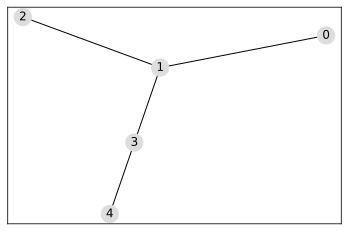

In [10]:
topology.draw()

The `Topology.draw(**kwargs)` method accepts the following keyword arguments:

- a string `layout` defining the NetworkX graph layout to use (default: `"kamada_kawai"`) from the available ones (exposed by the property `Topology.available_nx_layouts`);
- an optional pair of integer `figsize` (default: `None`), passed to [`matplotlib.pyplot.figure`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure);
- all keyword arguments from [`networkx.draw_networkx`](https://networkx.org/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx).

## Special Topologies

The `Topology` has several static methods to create special topologies such as lines, cycles, grids and complete topologies. 

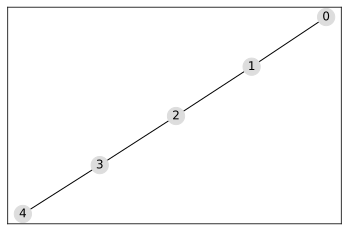

In [11]:
Topology.line(5).draw()

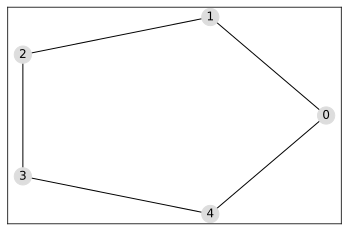

In [12]:
Topology.cycle(5).draw()

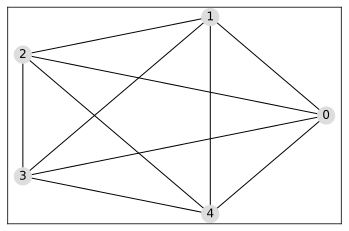

In [13]:
Topology.complete(5).draw()

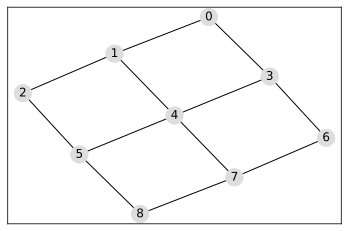

In [14]:
Topology.grid(3,3).draw()

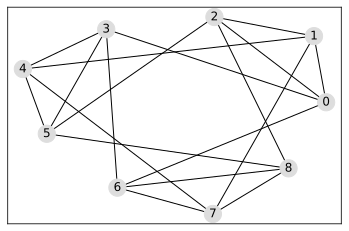

In [15]:
Topology.periodic_grid(3,3).draw()

## Qiskit Topologies

If the `qiskit` library is installed, topologies can be created from Qiskit backends (resp. backend configurations), using the `Topology.from_qiskit_backend(backend)` (resp. `Topology.from_qiskit_config(config)`) method.

In [16]:
import qiskit.test.mock
vigo = qiskit.test.mock.FakeVigo()
rochester = qiskit.test.mock.FakeRochester()

(topology == vigo_topology) = True


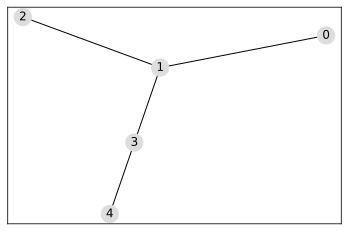

In [17]:
vigo_topology = Topology.from_qiskit_backend(vigo)
print(f"{(topology == vigo_topology) = }")
vigo_topology.draw()

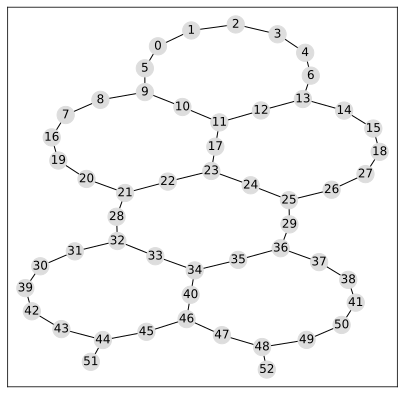

In [18]:
Topology.from_qiskit_backend(rochester).draw(figsize=(7,7))